In [1]:
from copy import deepcopy

In [11]:
def resolve_arg(program, argmode, base_offset, i, j):
    if argmode == 0:
        return program[i+j]
    elif argmode == 1:
        return i+j
    elif argmode == 2:
        return base_offset + program[i+j]

    
def intcode(program, inlist=[], i=0):
    outbuf = []
    base_offset = 0
    
    while True:
        if i >= len(program):
            print('end of program')
            return program
        opcode = program[i]
        
        op = opcode % 100
        argmodes = []
        argcode = opcode // 100
        while argcode > 0:
            argmodes.append(argcode % 10)
            argcode = argcode // 10
            
        # ADD A B -> C
        # --------------------------------------------------------
        if op == 1:
            if len(argmodes) < 1:
                idx1 = resolve_arg(program, 0, base_offset, i, 1)
            else:
                idx1 = resolve_arg(program, argmodes[0], base_offset, i, 1)
            
            if len(argmodes) < 2:
                idx2 = resolve_arg(program, 0, base_offset, i, 2)
            else:
                idx2 = resolve_arg(program, argmodes[1], base_offset, i, 2)
            
            if len(argmodes) < 3:
                idx3 = resolve_arg(program, 0, base_offset, i, 3)
            else:
                idx3 = resolve_arg(program, argmodes[2], base_offset, i, 3)

            bigdex = max([idx1, idx2, idx3])
            if len(program) <= bigdex:
                program += [0]*(bigdex - len(program) + 1)
                
            arg1 = program[idx1]
            arg2 = program[idx2]                
            
            program[idx3] = arg1 + arg2
            i += 4
        # MULTIPLY A B ->
        # --------------------------------------------------------
        elif op == 2:
            if len(argmodes) < 1:
                idx1 = resolve_arg(program, 0, base_offset, i, 1)
            else:
                idx1 = resolve_arg(program, argmodes[0], base_offset, i, 1)
            
            
            if len(argmodes) < 2:
                idx2 = resolve_arg(program, 0, base_offset, i, 2)
            else:
                idx2 = resolve_arg(program, argmodes[1], base_offset, i, 2)

            if len(argmodes) < 3:
                idx3 = resolve_arg(program, 0, base_offset, i, 3)
            else:
                idx3 = resolve_arg(program, argmodes[2], base_offset, i, 3)
                
            bigdex = max([idx1, idx2, idx3])
            if len(program) <= bigdex:
                program += [0]*(bigdex - len(program) + 1)
                
            arg1 = program[idx1]
            arg2 = program[idx2]
            
            program[idx3] = arg1 * arg2
            i += 4
        # INPUT -> A
        # --------------------------------------------------------
        elif op == 3:
            argmode = 0 if len(argmodes) < 1 else argmodes[0]
            idx = resolve_arg(program, argmode, base_offset, i, 1)
            
            if len(program) <= idx:
                program += [0]*(idx - len(program) + 1)

            if len(inlist) > 0:
                program[idx] = inlist[0]
                inlist = inlist[1:]
            else:
                program[idx] = int(input('>>> '))
#             print('input', program[idx])
            i += 2
        # OUTPUT A
        # --------------------------------------------------------
        elif op == 4:
            argmode = 0 if len(argmodes) < 1 else argmodes[0]
            idx = resolve_arg(program, argmode, base_offset, i, 1)
#             print('output', program[idx])
            outbuf.append(program[idx])                        
            i += 2
        # JUMP TRUE A != 0 -> B
        # --------------------------------------------------------
        elif op == 5:                
            argmode = 0 if len(argmodes) < 1 else argmodes[0]
            idx1 = resolve_arg(program, argmode, base_offset, i, 1)
            
            argmode = 0 if len(argmodes) < 2 else argmodes[1]
            idx2 = resolve_arg(program, argmode, base_offset, i, 2)
            
            bigdex = max([idx1, idx2])
            if len(program) <= bigdex:
                program += [0]*(bigdex - len(program) + 1)
            
            arg1 = program[idx1]
            arg2 = program[idx2]    
            if not arg1 == 0:
                i = arg2
            else:
                i += 3
        # JUMP FALSE A == 0 -> B
        # --------------------------------------------------------
        elif op == 6:
            argmode = 0 if len(argmodes) < 1 else argmodes[0]
            idx = resolve_arg(program, argmode, base_offset, i, 1)
            arg1 = program[idx]
            
            argmode = 0 if len(argmodes) < 2 else argmodes[1]
            idx = resolve_arg(program, argmode, base_offset, i, 2)
            arg2 = program[idx]
            
            if len(program) <= arg2:
                program += [0]*(arg2-len(program)+1)
                
            if arg1 == 0:
                i = arg2
            else:
                i += 3
        # LESS THAN A < B 1 -> C
        # --------------------------------------------------------
        elif op == 7:
            argmode = 0 if len(argmodes) < 1 else argmodes[0]
            idx = resolve_arg(program, argmode, base_offset, i, 1)
            arg1 = program[idx]
            
            argmode = 0 if len(argmodes) < 2 else argmodes[1]
            idx = resolve_arg(program, argmode, base_offset, i, 2)
            arg2 = program[idx]
            
            argmode = 0 if len(argmodes) < 3 else argmodes[2]
            idx = resolve_arg(program, argmode, base_offset, i, 3)
                
            if len(program) <= idx:
                program += [0]*(idx-len(program)+1)
                
            if arg1 < arg2:
                program[idx] = 1
            else:
                program[idx] = 0
            i += 4
        # EQUALS A == B 1 -> C
        # --------------------------------------------------------
        elif op == 8:
            argmode = 0 if len(argmodes) < 1 else argmodes[0]
            idx = resolve_arg(program, argmode, base_offset, i, 1)
            arg1 = program[idx]
            
            argmode = 0 if len(argmodes) < 2 else argmodes[1]
            idx = resolve_arg(program, argmode, base_offset, i, 2)
            arg2 = program[idx]
            
            argmode = 0 if len(argmodes) < 3 else argmodes[2]
            idx = resolve_arg(program, argmode, base_offset, i, 3)
                
            if len(program) <= idx:
                program += [0]*(idx-len(program)+1)
                
            if arg1 == arg2:
                program[idx] = 1
            else:
                program[idx] = 0
            i += 4
        # SHIFT RELATIVE BASE
        # --------------------------------------------------------
        elif op == 9:
            argmode = 0 if len(argmodes) < 1 else argmodes[0]
            idx = resolve_arg(program, argmode, base_offset, i, 1)
            arg1 = program[idx]
            base_offset += arg1
            if len(program) <= base_offset:
                program += [0]*(base_offset-len(program)+1)
            i += 2
        # HALT
        # --------------------------------------------------------
        elif op == 99:
            return outbuf
        # INVALID
        # --------------------------------------------------------
        else:
            print(program[i], 'is not an instruction')
            return outbuf

In [13]:
with open('calca_09_input.txt', 'r') as infile:
    progstring = [r.strip() for r in infile][0]
program = [int(e) for e in progstring.split(',')]
outbuf = intcode(program, inlist=[1])
print(outbuf)

[3780860499]


In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [15]:
with open('calca_19_input.txt', 'r') as infile:
    progstring = [r.strip() for r in infile][0]
program = [int(e) for e in progstring.split(',')]

outbuf = intcode(deepcopy(program), inlist=[1, 1])
print(outbuf)

[0]


199
199


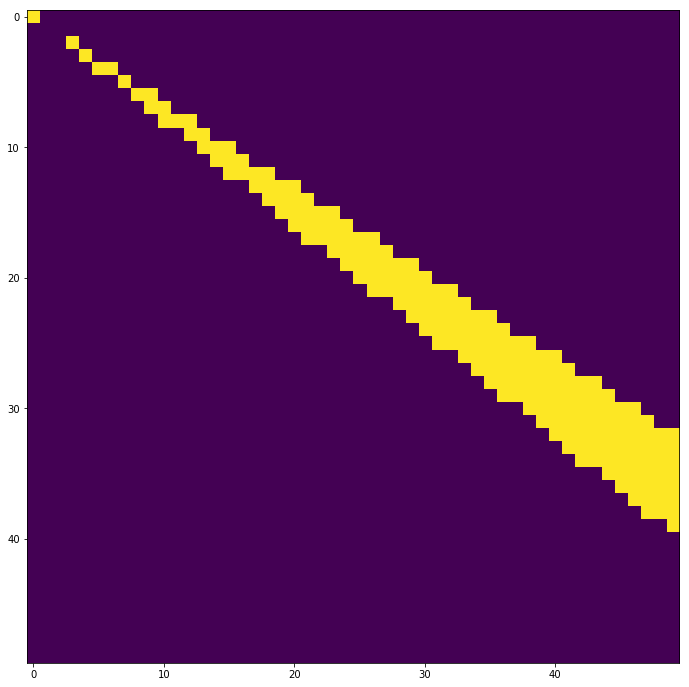

In [17]:
xmax = 50
ymax = 50

tracmap = []
for i in range(ymax):
    tracrow = []
    for j in range(xmax):
        tracrow.append(0)
    tracmap.append(tracrow)

runsum = 0
for i in range(len(tracmap)):
    for j in range(len(tracmap[0])):
        outbuf = intcode(deepcopy(program), inlist=[j, i])
        tracmap[i][j] = outbuf[0]
        runsum += outbuf[0]
#         if i == j:
#             tracmap[i][j] = 1
#         print(i, j, outbuf)
        
print(runsum)

tracsum = 0
for row in tracmap:
    tracsum += sum(row)
print(tracsum)
tracray = np.array(tracmap)
plt.figure(figsize=(12, 12))
plt.imshow(tracray)

In [ ]:
found = False
i = 90
j = 90

fitside = 100

colstart = 0
prev_out_ij = 0
while not found:
    out_ij = intcode(deepcopy(program), inlist=[j, i])[0]
    
    if (prev_out_ij == 0) and (out_ij == 1):
        colstart = j
        
    if (prev_out_ij == 1) and (out_ij == 0):
        beamwidth = j - colstart
        i += 1
        j = max([colstart, j-fitside])
        prev_out_ij = out_ij
        if (i % 100) == 0:
            print('moving to row', i, 'prev width', beamwidth)
        continue
        
    prev_out_ij = out_ij
        
    if out_ij == 1:        
        nj = j + fitside - 1
        ni = i + fitside - 1
        
        out_nj = intcode(deepcopy(program), inlist=[nj, i])[0]
        out_ni = intcode(deepcopy(program), inlist=[j, ni])[0]
        
        if (out_nj == 1) and (out_ni == 1):
            found = True
            print('solution', i, j)
            
    j += 1

moving to row 100 prev width 30
moving to row 200 prev width 61
moving to row 300 prev width 92
moving to row 400 prev width 101
moving to row 500 prev width 101
